<a href="https://colab.research.google.com/github/amrutha20-s/Samsung-Innovation-Campus/blob/main/mtcars_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SIC/0.Samsung CSR AIML/Resources/SIC-Artificial-Intelligence/SIC_AI_Coding_Exercises/SIC_AI_Chapter_05_Coding_Exercises/data_mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.shape

(32, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
cluster_df = df.drop('model', axis=1)

cluster_df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


KeyError: 'cluster'

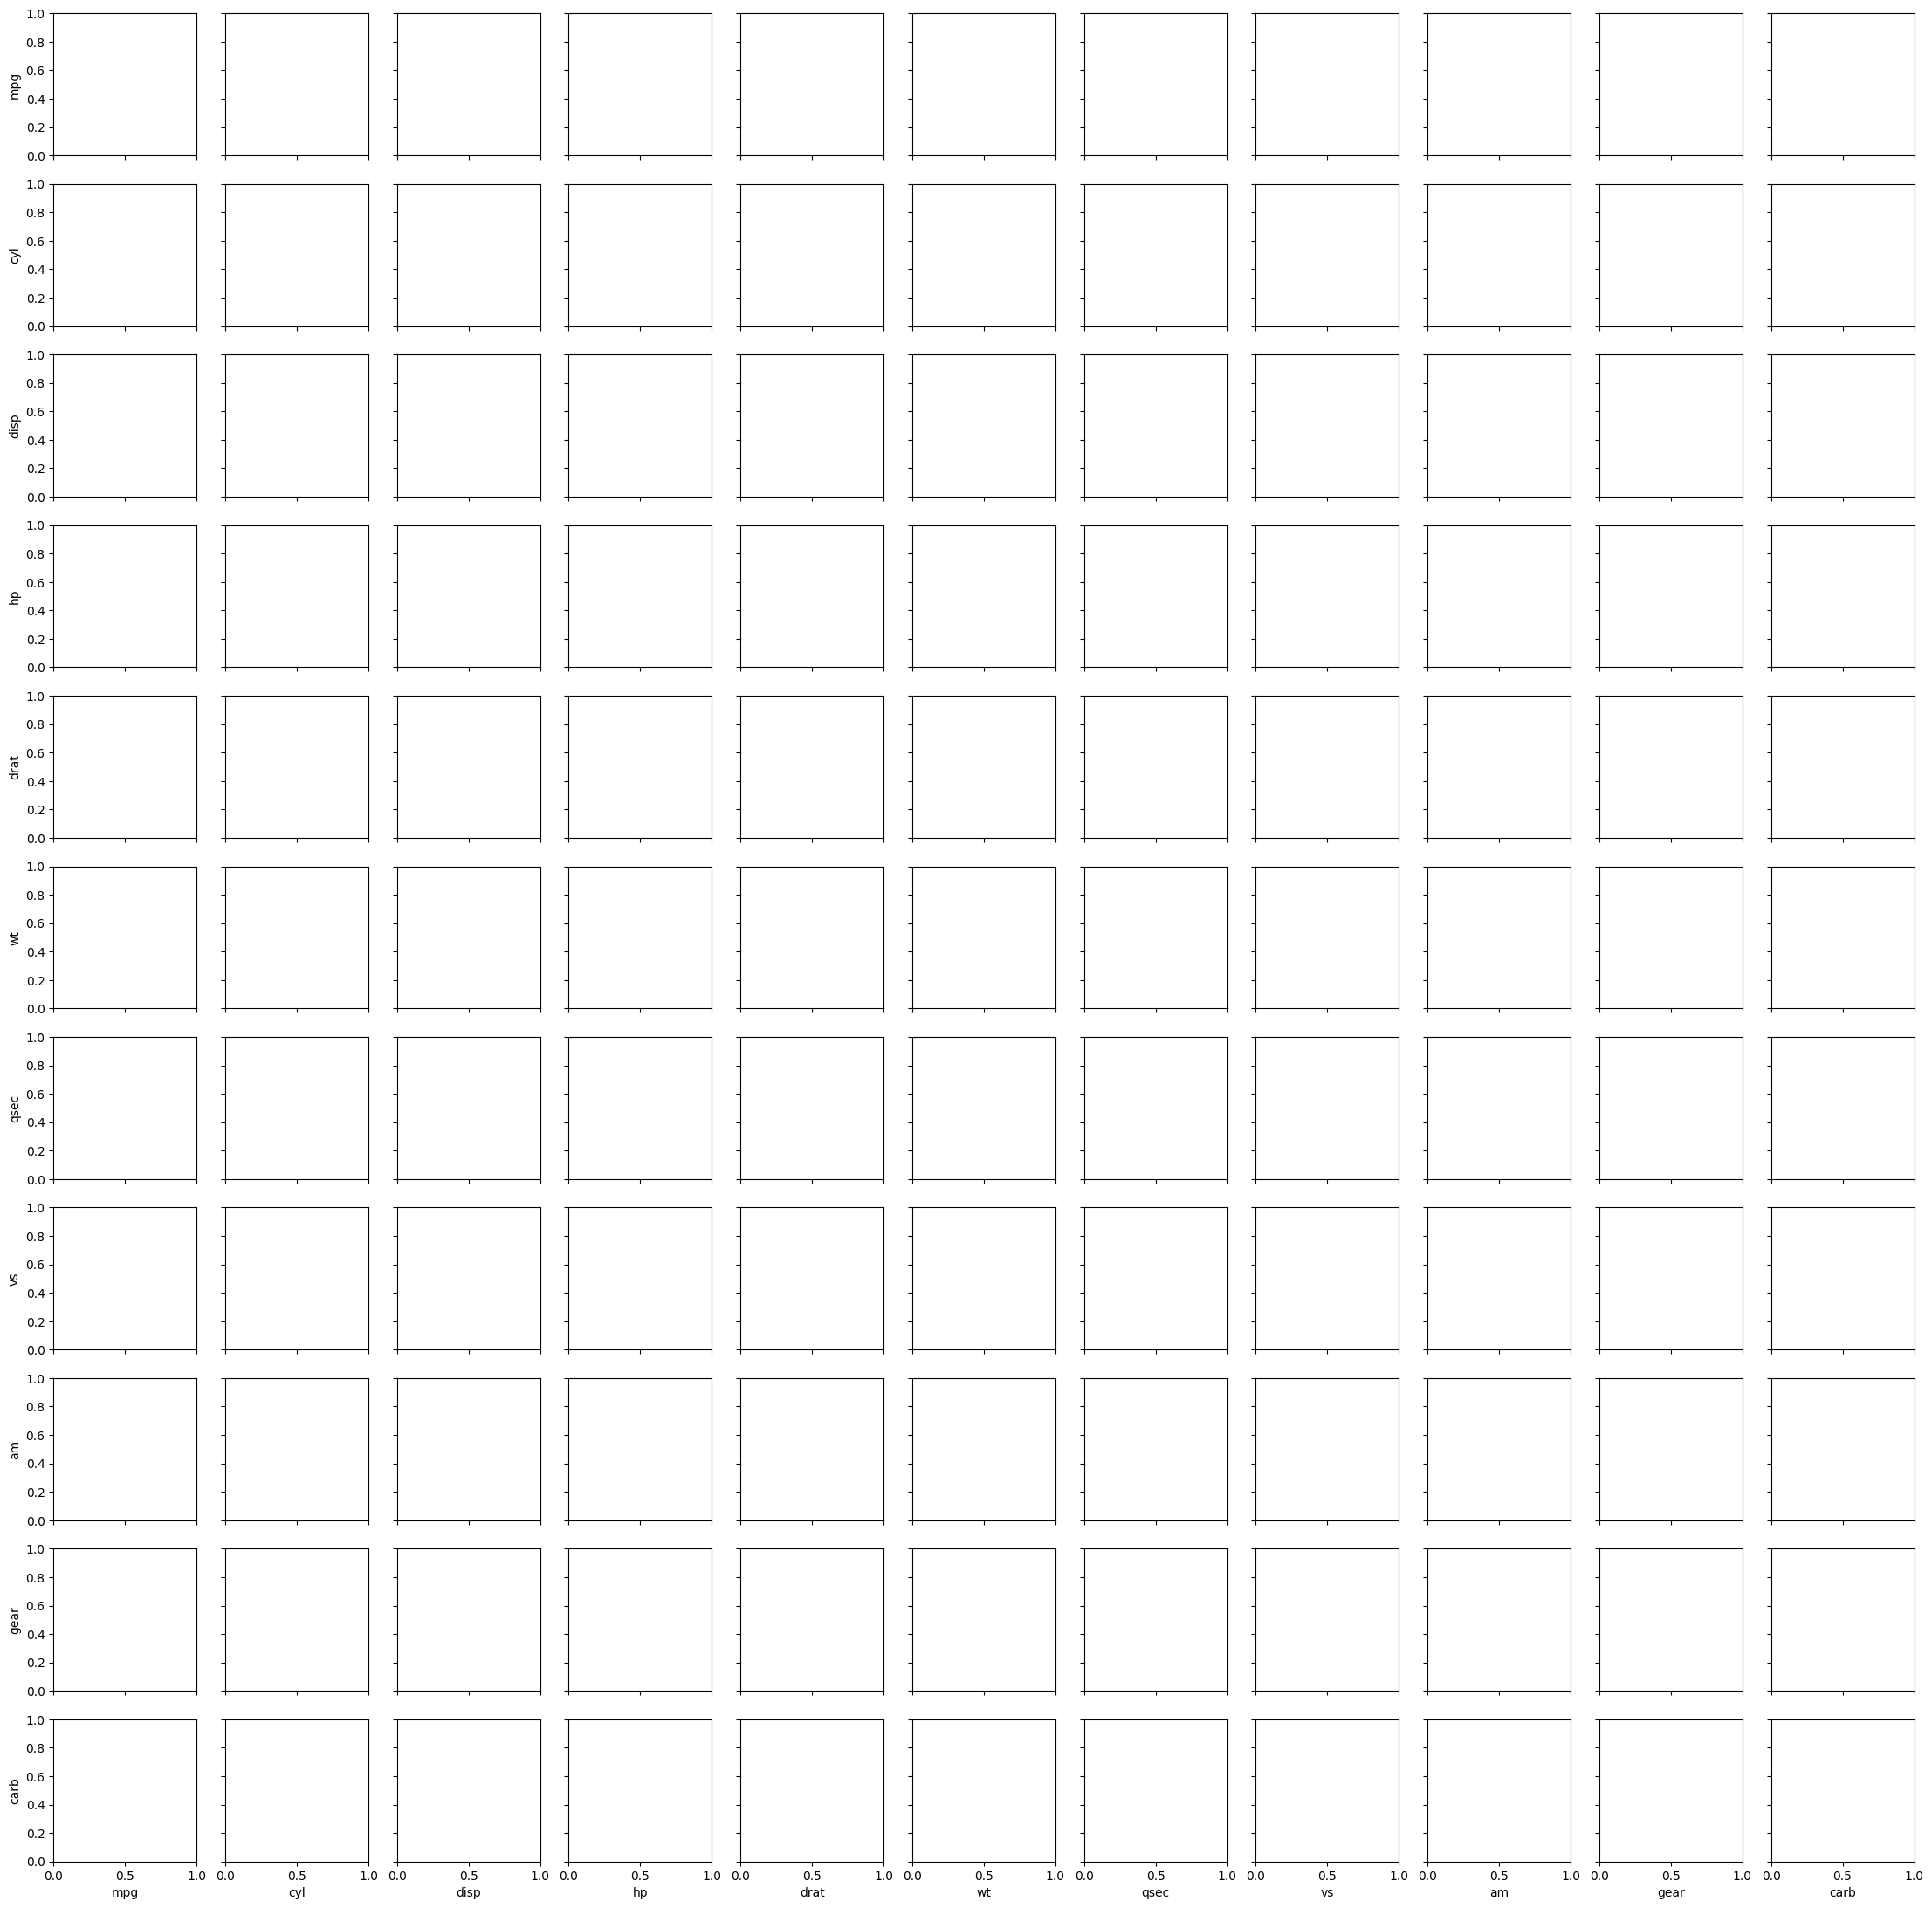

In [ ]:
import seaborn as sns

sns.pairplot(df, hue='cluster')


In [ ]:
cluster = KMeans(n_clusters=3, random_state=0)

cluster.fit(cluster_df)

KMeans(n_clusters=3, random_state=0)

In [ ]:
df['cluster'] = cluster.fit_predict(cluster_df)

df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,2
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,2
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,2
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1


In [ ]:
df['cluster'].value_counts()

,count
cluster,
1,14
0,11
2,7


<Axes: >

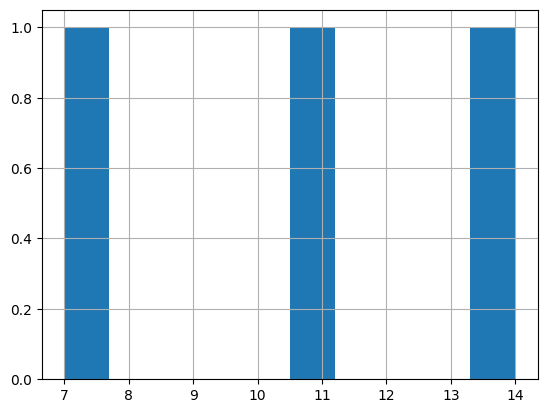

In [ ]:
df['cluster'].value_counts().hist()

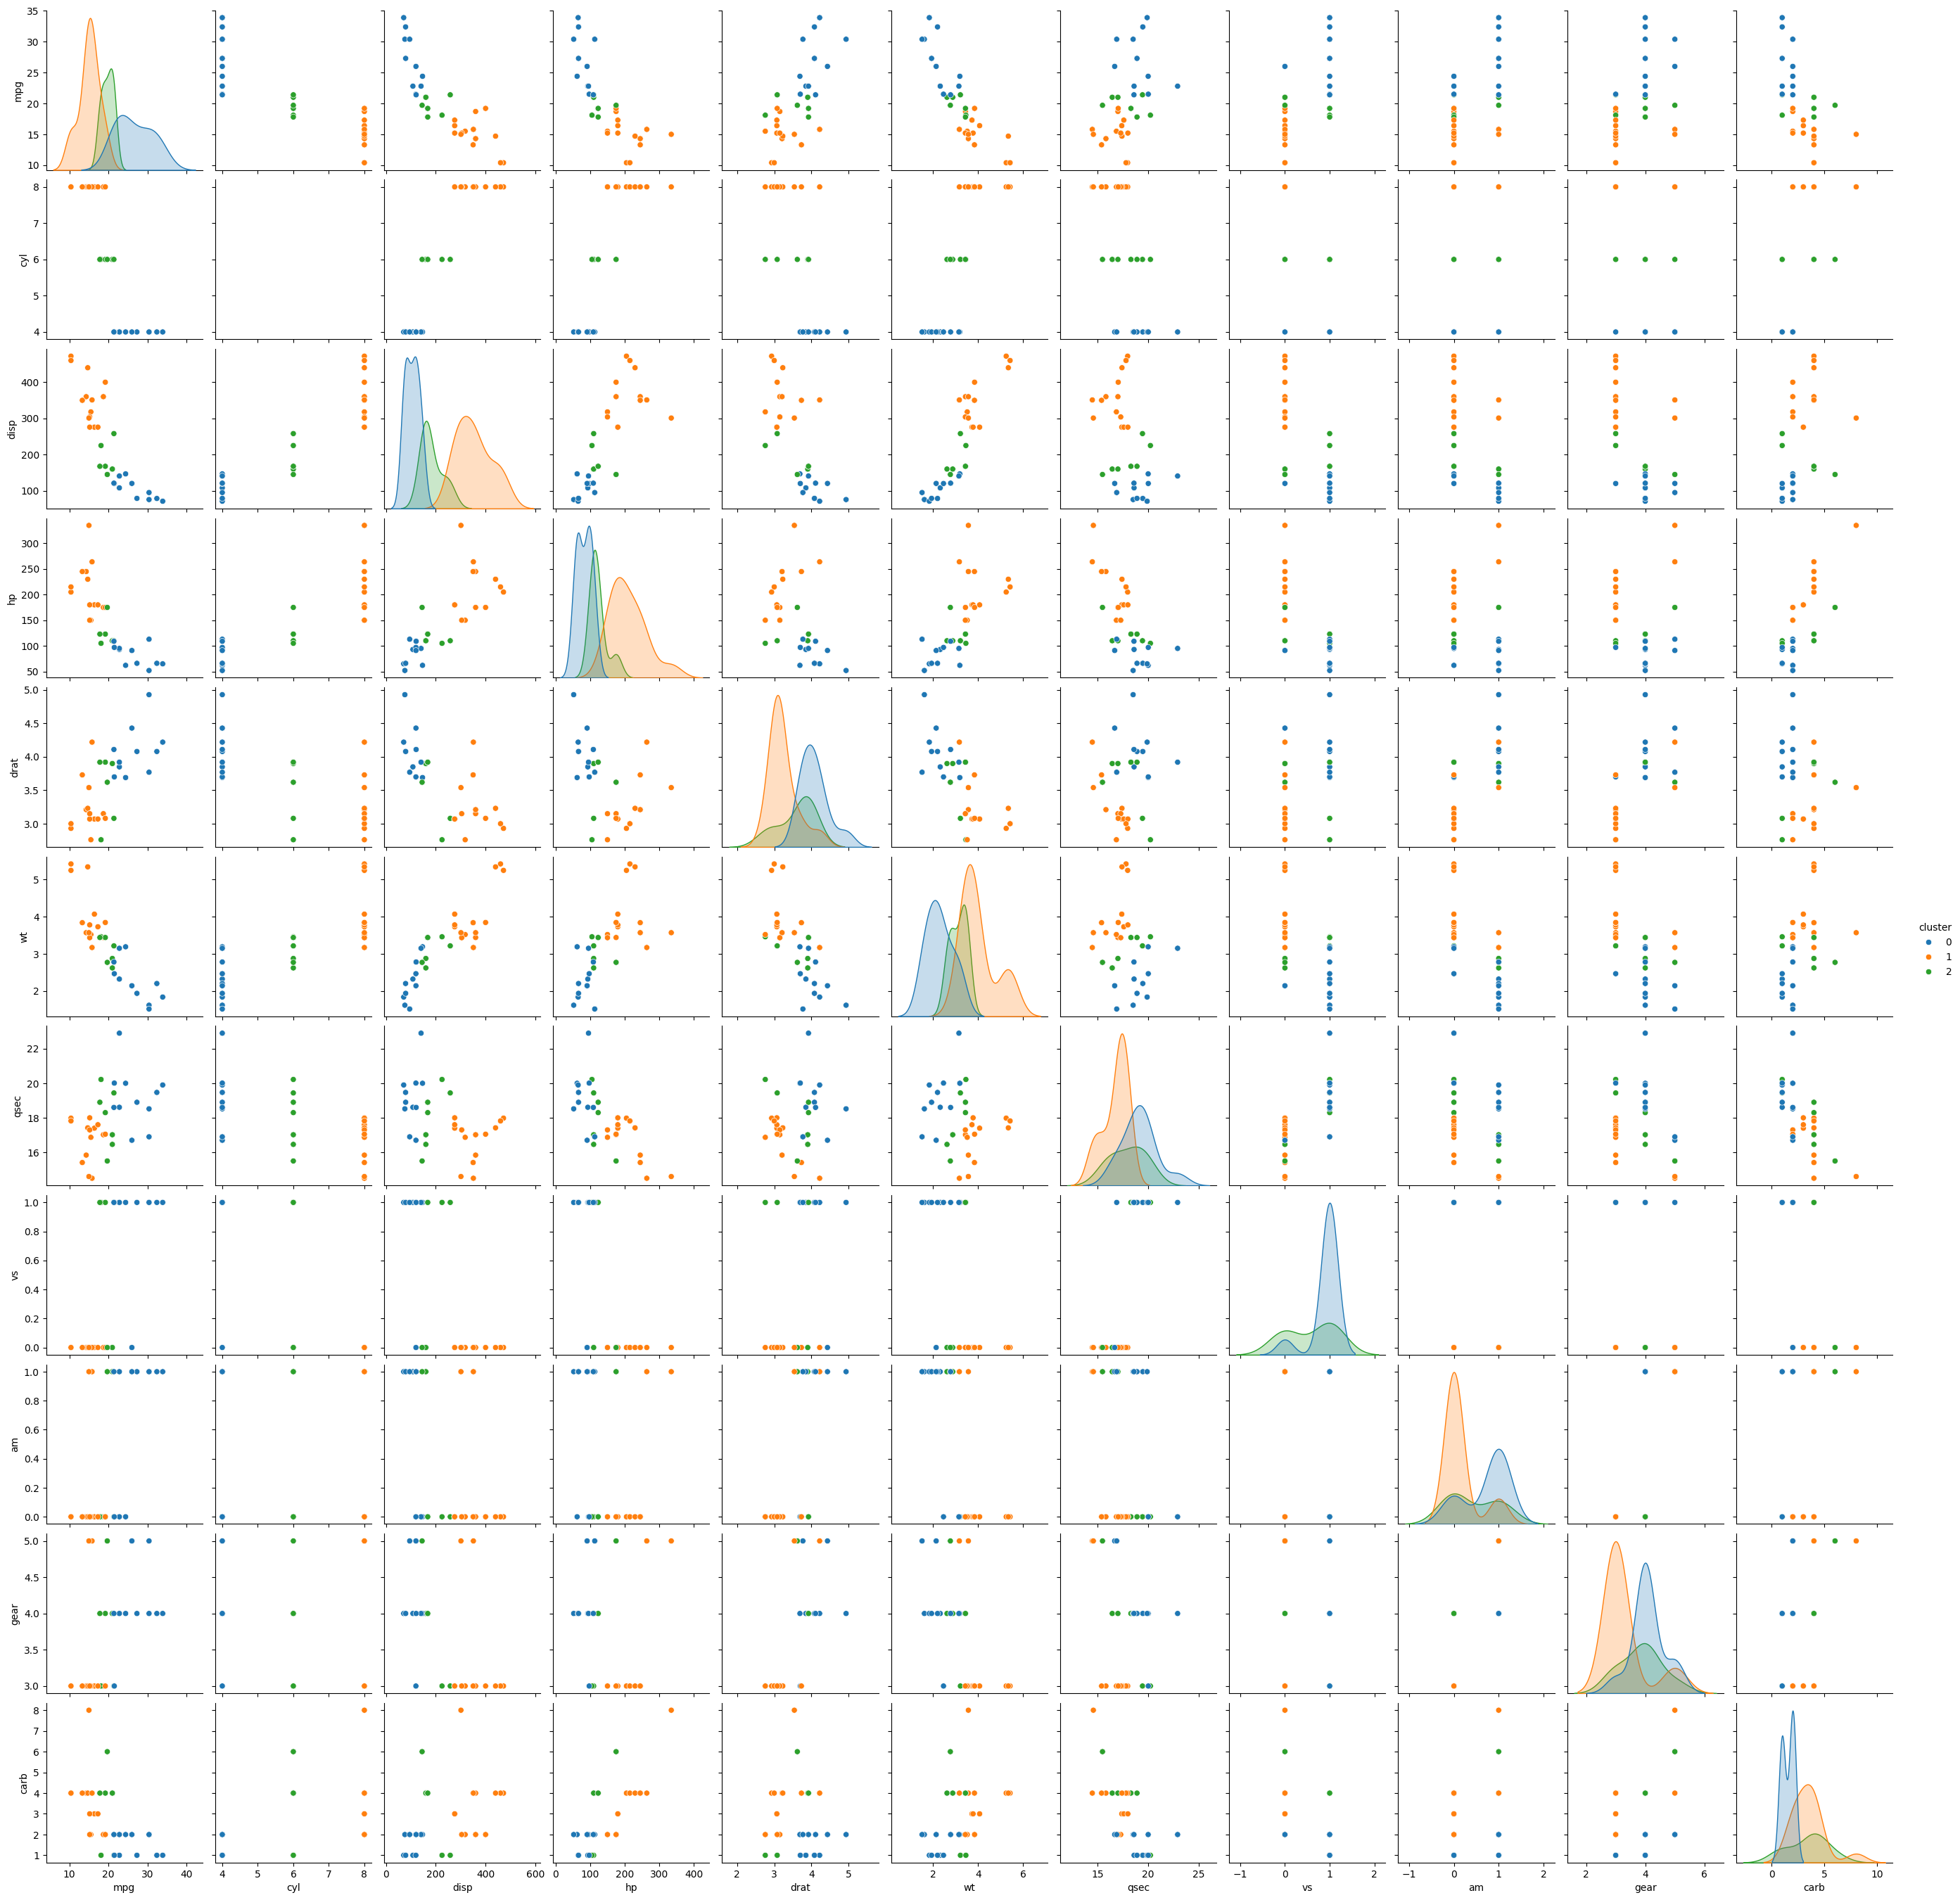

In [ ]:
import seaborn as sns

sns.pairplot(df, hue='cluster',palette='tab10')

<Axes: >

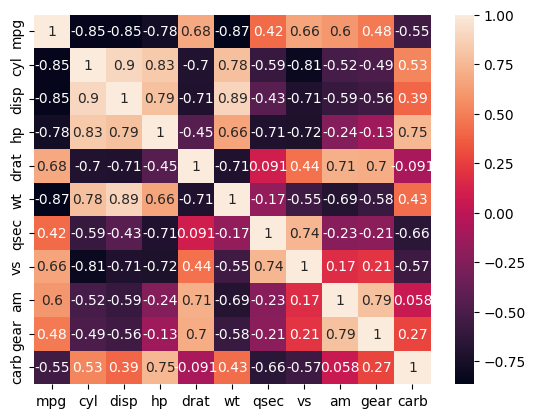

In [ ]:
sns.heatmap(cluster_df.corr(), annot=True)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hcluster = AgglomerativeClustering(n_clusters=3)

In [ ]:
hcluster.fit_predict(cluster_df)

array([1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2,
       2, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
df['hcluster'] = hcluster.fit_predict(cluster_df)

df.sample(2)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster,hcluster
6,Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4,1,0
2,Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1,0,1


In [ ]:
df['hcluster'].value_counts()

,count
hcluster,
1,16
0,9
2,7


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dcluster = DBSCAN(eps=0.5, min_samples=5)

In [ ]:
dcluster.fit_predict(cluster_df)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
dcluster.fit_predict(cluster_df)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
df['dcluster'] = dcluster.fit_predict(cluster_df)

df.sample(2)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster,hcluster,dcluster
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6,2,1,-1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,0,1,-1


In [ ]:
df['dcluster'].value_counts()

,count
dcluster,
-1,32
